In [2]:
# Basic Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLP & Text Preprocessing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data (run once)
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
# Load the dataset
df = pd.read_csv(r"C:\ML Projects\ML datasets\UpdatedResumeDataSet.csv")

# Display the top 5 rows
df.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
# Shape of the dataset
print("Dataset Shape:", df.shape)

# Column names
print("\nColumn Names:", df.columns.tolist())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check data types
print("\nData Types:\n", df.dtypes)


Dataset Shape: (962, 2)

Column Names: ['Category', 'Resume']

Missing Values:
 Category    0
Resume      0
dtype: int64

Data Types:
 Category    object
Resume      object
dtype: object


In [7]:
# Number of unique job categories
print("\nNumber of Unique Categories:", df['Category'].nunique())

# Display all unique categories
print("\nUnique Categories:\n", df['Category'].unique())



Number of Unique Categories: 25

Unique Categories:
 ['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


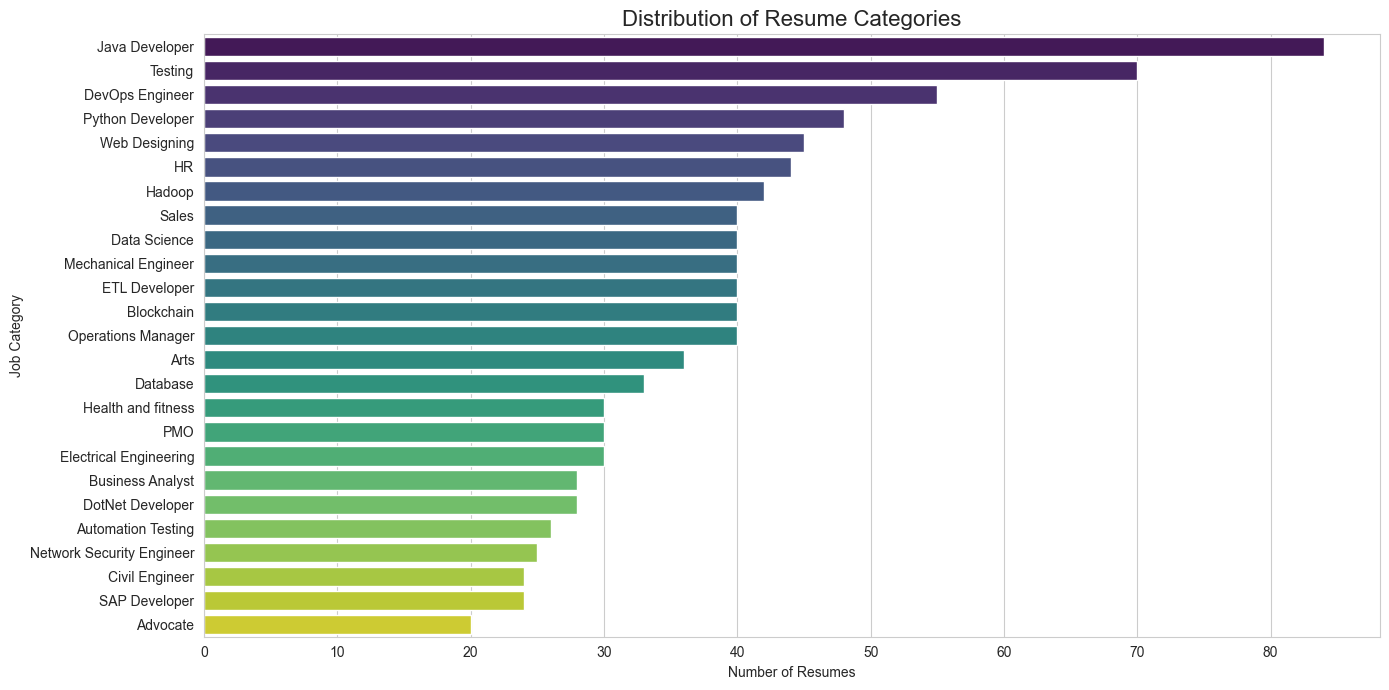

In [8]:
#Visualization of Resume Categories
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size and style
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# Count plot for categories
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index, palette='viridis')
plt.title("Distribution of Resume Categories", fontsize=16)
plt.xlabel("Number of Resumes")
plt.ylabel("Job Category")
plt.tight_layout()
plt.show()


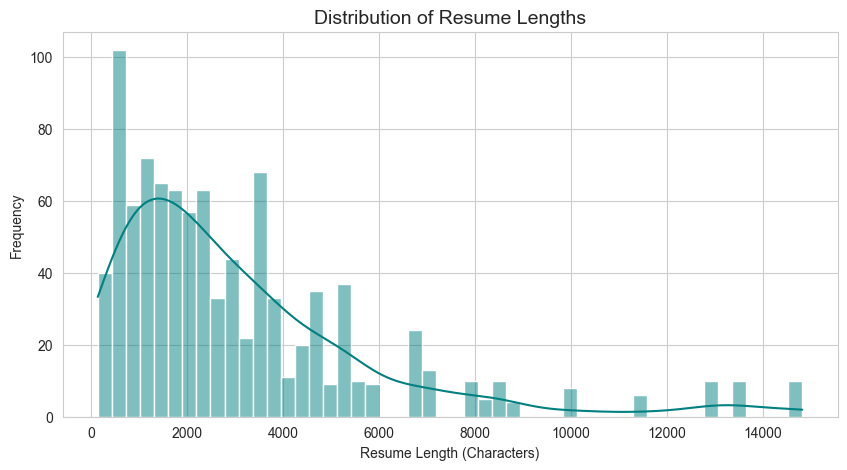

📊 Resume Length Stats:
Mean Length : 3160.364864864865
Max Length  : 14816
Min Length  : 142


In [9]:
#Analyse Resume Text length

# Add a column for resume text length (in characters)
df['Resume_Length'] = df['Resume'].apply(len)

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Resume_Length'], bins=50, kde=True, color='teal')
plt.title("Distribution of Resume Lengths", fontsize=14)
plt.xlabel("Resume Length (Characters)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Print some stats
print("📊 Resume Length Stats:")
print("Mean Length :", df['Resume_Length'].mean())
print("Max Length  :", df['Resume_Length'].max())
print("Min Length  :", df['Resume_Length'].min())


In [32]:
#Data Cleaning and Preprocessing

import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')  # For lemmatization support

lemmatizer = WordNetLemmatizer()

def clean_resume(text):
    # Remove HTML
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Lowercase
    text = text.lower()

    # Lemmatize instead of stemming
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

    # Remove junk characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shaun\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shaun\AppData\Roaming\nltk_data...


In [ ]:
#Applying cleaning to all resumes

# Apply the clean_resume function
df['Cleaned_Resume'] = df['Resume'].apply(clean_resume)

# Display a sample cleaned resume
print(" Cleaned Sample Resume:\n")
print(df['Cleaned_Resume'].iloc[0][:1000])


🧾 Cleaned Sample Resume:

skill programming language python panda numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm na ve bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch dj dcjs plotly kibana matplotlib ggplot tableau others regular expression html cs angular logstash kafka python flask git docker computer vision open cv understanding deep learningeducation detail data science assurance associate data science assurance associate ernst young llp skill detail javascript exprience month jquery exprience month python exprience monthscompany detail company ernst young llp description fraud investigation dispute service assurance technology assisted review tar technology assisted review assist accelerating review process run analyti

In [34]:
# visual check-checking the difference between original and cleaned resumes

# Compare before and after cleaning
print("🔷 Original Resume Snippet:\n", df['Resume'].iloc[0][:500])
print("\n🔶 Cleaned Resume Snippet:\n", df['Cleaned_Resume'].iloc[0][:500])


🔷 Original Resume Snippet:
 Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃÂ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotl

🔶 Cleaned Resume Snippet:
 skill programming language python panda numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm na ve bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch dj dcjs plotly kibana matplotlib gg

In [35]:
df['Category'].unique()

# Category distribution to help you choose
df['Category'].value_counts()


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

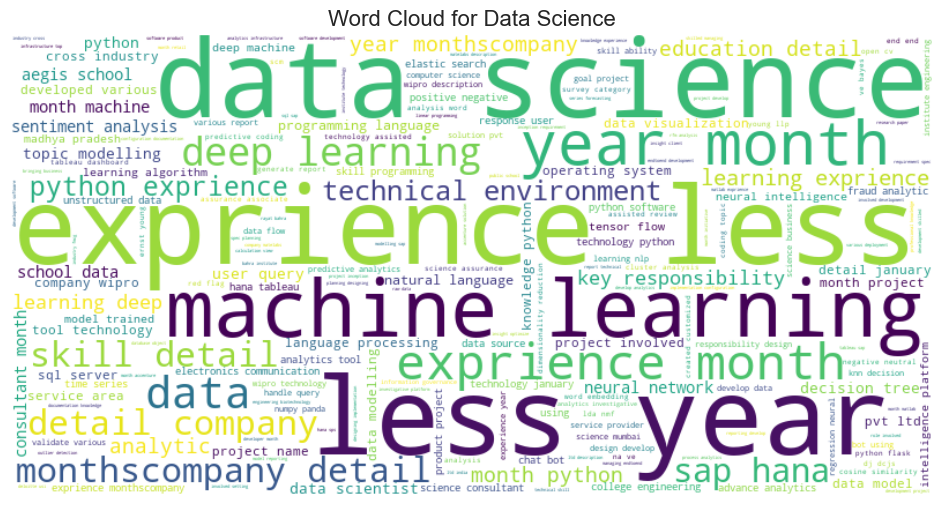

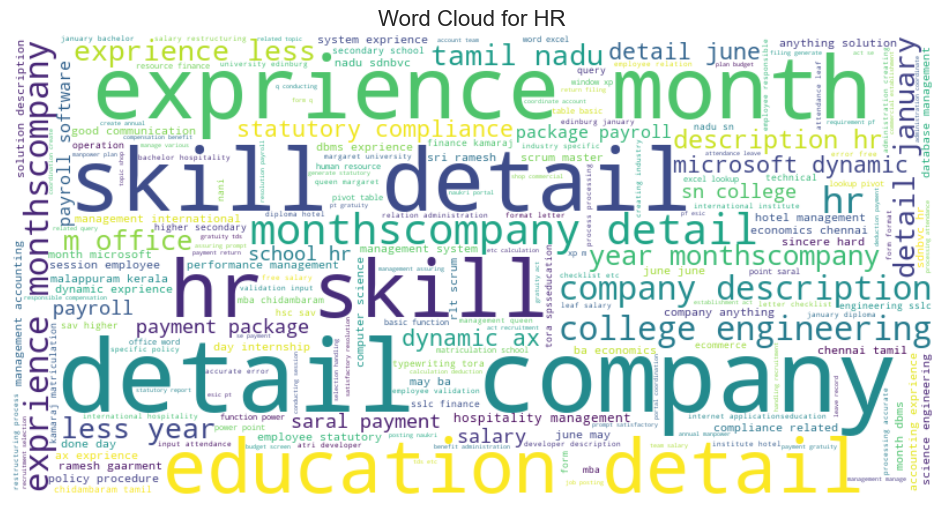

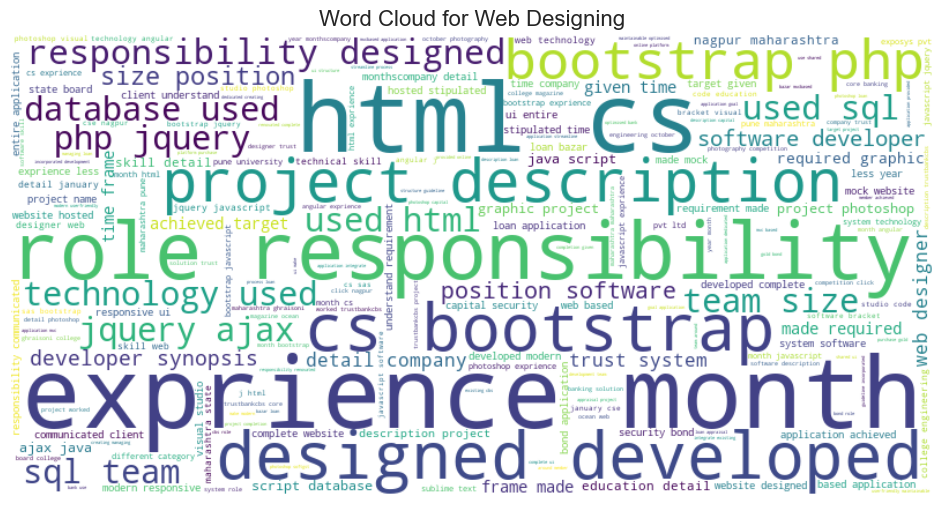

In [36]:
#Generating wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for a given category
def plot_wordcloud(category_name):
    text = " ".join(df[df['Category'] == category_name]['Cleaned_Resume'])
    if not text.strip():
        print(f"No data available for category: {category_name}")
        return
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {category_name}", fontsize=16)
    plt.show()

# Generate WordClouds
plot_wordcloud("Data Science")
plot_wordcloud("HR")
plot_wordcloud("Web Designing")


In [37]:
#previewing cleaned resumes 

def preview_samples(category, count=1):
    print(f"\n Category: {category} — Showing {count} Sample(s)\n")
    samples = df[df['Category'] == category]['Cleaned_Resume'].head(count).values
    for i, text in enumerate(samples):
        print(f"🔹 Sample {i+1}:\n{text[:1000]}...\n{'-'*80}")

# Preview 1 cleaned resume per category
preview_samples("Data Science", 1)
preview_samples("HR", 1)
preview_samples("Testing", 1)



 Category: Data Science — Showing 1 Sample(s)

🔹 Sample 1:
skill programming language python panda numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm na ve bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch dj dcjs plotly kibana matplotlib ggplot tableau others regular expression html cs angular logstash kafka python flask git docker computer vision open cv understanding deep learningeducation detail data science assurance associate data science assurance associate ernst young llp skill detail javascript exprience month jquery exprience month python exprience monthscompany detail company ernst young llp description fraud investigation dispute service assurance technology assisted review tar technology assisted review assist accel

In [38]:
# Reload with UTF-8 encoding (remove 'errors' argument)
# Alternate encoding that handles many Indian/Windows files
df = pd.read_csv(r"C:\ML Projects\ML datasets\UpdatedResumeDataSet.csv", encoding='ISO-8859-1')


# Re-run this to apply cleaning again
df['Cleaned_Resume'] = df['Resume'].apply(clean_resume)


preview_samples("Data Science", 1)
preview_samples("HR", 1)
preview_samples("Testing", 1)



 Category: Data Science — Showing 1 Sample(s)

🔹 Sample 1:
skill programming language python panda numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm na ve bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch dj dcjs plotly kibana matplotlib ggplot tableau others regular expression html cs angular logstash kafka python flask git docker computer vision open cv understanding deep learningeducation detail data science assurance associate data science assurance associate ernst young llp skill detail javascript exprience month jquery exprience month python exprience monthscompany detail company ernst young llp description fraud investigation dispute service assurance technology assisted review tar technology assisted review assist accel

In [39]:
#TF-IDF (Term Frequency–Inverse Document Frequency)

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer
tfidf = TfidfVectorizer(
    stop_words='english',      # remove common English stopwords
    max_features=3000          # limit vocabulary size to top 3000 words
)


In [40]:
# Apply TF-IDF vectorization
X = tfidf.fit_transform(df['Cleaned_Resume'])

# Shape of the result
print("TF-IDF matrix shape:", X.shape)  # (num_samples, num_features)


TF-IDF matrix shape: (962, 3000)


In [41]:
from sklearn.preprocessing import LabelEncoder

# Convert job categories into numeric labels
le = LabelEncoder()
y = le.fit_transform(df['Category'])

# Show mapping (optional)
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:\n", label_mapping)


Label Mapping:
 {'Advocate': np.int64(0), 'Arts': np.int64(1), 'Automation Testing': np.int64(2), 'Blockchain': np.int64(3), 'Business Analyst': np.int64(4), 'Civil Engineer': np.int64(5), 'Data Science': np.int64(6), 'Database': np.int64(7), 'DevOps Engineer': np.int64(8), 'DotNet Developer': np.int64(9), 'ETL Developer': np.int64(10), 'Electrical Engineering': np.int64(11), 'HR': np.int64(12), 'Hadoop': np.int64(13), 'Health and fitness': np.int64(14), 'Java Developer': np.int64(15), 'Mechanical Engineer': np.int64(16), 'Network Security Engineer': np.int64(17), 'Operations Manager': np.int64(18), 'PMO': np.int64(19), 'Python Developer': np.int64(20), 'SAP Developer': np.int64(21), 'Sales': np.int64(22), 'Testing': np.int64(23), 'Web Designing': np.int64(24)}


 SVM Accuracy: 0.9948

 Classification Report:

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00         9
             

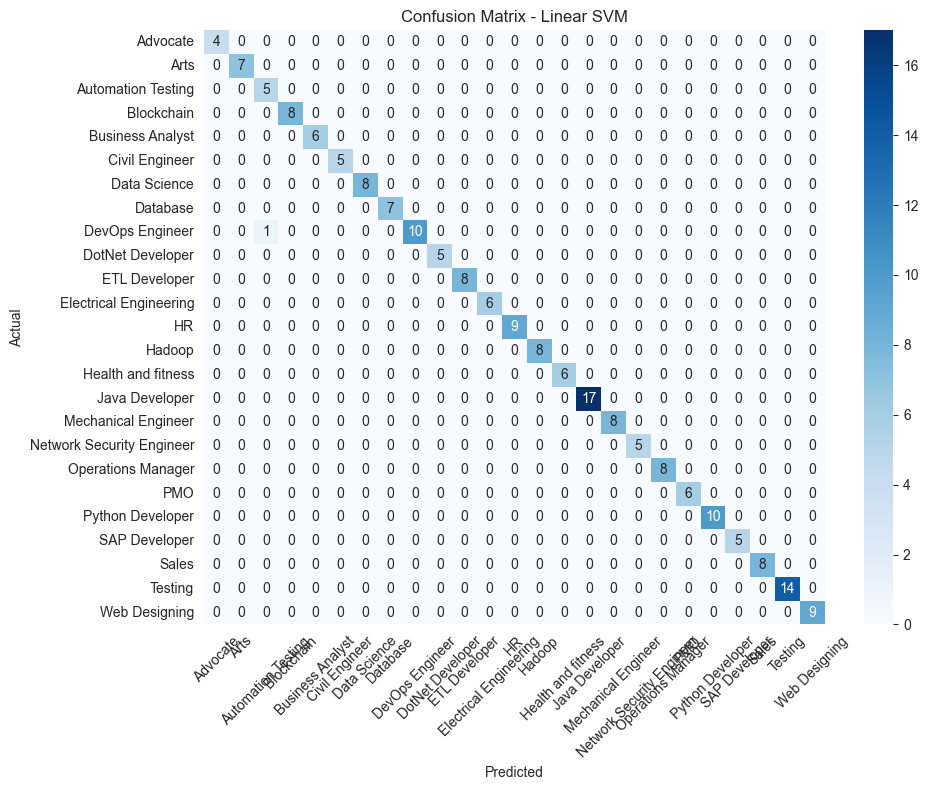

In [44]:
# 1. TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X = tfidf.fit_transform(df['Cleaned_Resume'])

# 2. Encode Category Labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['Category'])  # this is your target variable

# 3. Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train Linear SVM
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# 5. Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = svm_model.predict(X_test)

# Accuracy
print(f" SVM Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Classification Report
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
#Hyperparameter Tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'max_iter': [1000, 1500]
}

grid = GridSearchCV(LinearSVC(), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Params: {'C': 10, 'max_iter': 1000}
Best Accuracy: 0.9960988164721142


In [46]:
import joblib

# Save model
joblib.dump(svm_model, 'resume_classifier_model.pkl')

# Save TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Save LabelEncoder
joblib.dump(le, 'label_encoder.pkl')

print("Model, vectorizer, and label encoder saved!")


Model, vectorizer, and label encoder saved!


In [47]:
# Load model
loaded_model = joblib.load('resume_classifier_model.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')
loaded_encoder = joblib.load('label_encoder.pkl')

# Predict from raw resume text
sample_text = ["Experienced Python developer with knowledge of data science and ML. Worked with pandas and scikit-learn."]
cleaned_sample = clean_resume(sample_text[0])
vectorized = loaded_vectorizer.transform([cleaned_sample])
predicted_label = loaded_model.predict(vectorized)
print("Predicted Category:", loaded_encoder.inverse_transform(predicted_label)[0])


Predicted Category: Data Science
